In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
#plt.style.use('seaborn-poster')
sys.path.append('.')
pd.set_option('display.max_columns', None)

In [2]:
from analysis_support import *

# Halton Sequence, $A^*$, Multi-edge ${\cal V}_k$ cuts

In [3]:
file_pattern = 'halton.a_star.multi_edge/lazy_prm_bc.BARN.instance_*.json'
# Halton results loading
vanilla_results = collect_deterministic_results(file_pattern)
table = tabulate_deterministic_results(vanilla_results)

Found 1480 result files
Missing results: 0


In [4]:
table

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_173,567,1,0,42,454,3,3.564679,0.005129,0.445653,2,True,11.570603,11.572438,11.586764,11.650862,7
1,BARN,instance_219,42,0,0,42,505,3,4.569977,0.000195,0.181687,2,True,10.031469,10.031469,9.977454,9.977454,7
2,BARN,instance_217,567,2,0,52,649,4,7.822138,0.004464,0.382426,3,True,11.020105,10.278146,11.261898,10.300622,5
3,BARN,instance_151,567,1,2,62,804,5,4.331161,0.030138,0.424716,4,True,9.872124,9.800741,9.847405,9.741887,7
4,BARN,instance_152,1,0,4,62,821,5,3.862013,0.003886,0.097111,4,True,10.077781,10.077781,10.079337,10.079337,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,BARN,instance_016,1337,1,0,52,656,4,2.904326,0.065465,0.358192,3,True,14.725652,11.627204,14.854153,11.677411,6
1476,BARN,instance_133,8193,1,1,52,636,4,6.760062,0.005114,0.218408,3,True,10.850973,10.804386,10.960701,10.864231,8
1477,BARN,instance_056,1337,0,0,32,358,2,6.332786,0.000105,0.239068,1,True,10.360349,10.360349,10.351744,10.351744,4
1478,BARN,instance_161,8193,0,0,32,361,2,5.150895,0.000144,0.097822,1,True,10.440148,10.440148,10.420827,10.420827,5


## Analysis

### Halton Sequence Sampling

In [5]:
multiple_iterations = table[table['iterations']>1]
multiple_iterations

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_173,567,1,0,42,454,3,3.564679,0.005129,0.445653,2,True,11.570603,11.572438,11.586764,11.650862,7
1,BARN,instance_219,42,0,0,42,505,3,4.569977,0.000195,0.181687,2,True,10.031469,10.031469,9.977454,9.977454,7
2,BARN,instance_217,567,2,0,52,649,4,7.822138,0.004464,0.382426,3,True,11.020105,10.278146,11.261898,10.300622,5
3,BARN,instance_151,567,1,2,62,804,5,4.331161,0.030138,0.424716,4,True,9.872124,9.800741,9.847405,9.741887,7
4,BARN,instance_152,1,0,4,62,821,5,3.862013,0.003886,0.097111,4,True,10.077781,10.077781,10.079337,10.079337,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,BARN,instance_035,1337,0,1,42,481,3,8.389869,0.000569,0.150564,2,True,10.145640,10.145640,10.163610,10.163610,5
1472,BARN,instance_071,8193,0,1,42,474,3,8.389869,0.000271,0.167322,2,True,9.838319,9.838319,9.842410,9.842410,5
1473,BARN,instance_122,1337,1,0,42,633,3,5.667085,0.000347,0.161573,2,True,10.360349,9.828162,10.351744,9.756910,5
1475,BARN,instance_016,1337,1,0,52,656,4,2.904326,0.065465,0.358192,3,True,14.725652,11.627204,14.854153,11.677411,6


In [6]:
single_iterations = table[table['iterations']==1]
single_iterations

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
5,BARN,instance_192,567,0,0,32,263,2,5.150895,0.000132,0.159657,1,True,12.285628,12.285628,12.529492,12.529492,5
6,BARN,instance_060,1337,0,0,32,349,2,5.150895,0.000121,0.067521,1,True,10.440148,10.440148,10.420827,10.420827,5
10,BARN,instance_079,42,0,0,32,334,2,5.150895,0.000124,0.209641,1,True,10.360349,10.360349,10.351744,10.351744,4
11,BARN,instance_187,42,0,0,32,269,2,2.904326,0.000162,0.092586,1,True,11.900562,11.900562,12.034209,12.034209,6
14,BARN,instance_291,42,0,0,32,334,2,5.150895,0.000108,0.084738,1,True,10.360349,10.360349,10.351744,10.351744,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,BARN,instance_195,567,0,0,32,314,2,5.150895,0.000163,0.178108,1,True,11.474006,11.474006,11.468859,11.468859,5
1474,BARN,instance_011,42,0,0,32,360,2,6.332786,0.000124,0.188998,1,True,10.596594,10.596594,10.644728,10.644728,5
1477,BARN,instance_056,1337,0,0,32,358,2,6.332786,0.000105,0.239068,1,True,10.360349,10.360349,10.351744,10.351744,4
1478,BARN,instance_161,8193,0,0,32,361,2,5.150895,0.000144,0.097822,1,True,10.440148,10.440148,10.420827,10.420827,5


In [7]:
multiple_iterations['iterations'].describe()

count    910.000000
mean       3.090110
std        1.785719
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       23.000000
Name: iterations, dtype: float64

In [8]:
multiple_iterations[['instance', 'seed', 'iterations']].sort_values('iterations', ascending=False).head(20)[['instance', 'seed', 'iterations']]

,instance,seed,iterations
453,instance_120,567,23
814,instance_211,42,14
582,instance_238,8193,14
748,instance_156,1337,12
48,instance_181,1337,11
46,instance_278,8193,10
620,instance_188,1337,10
955,instance_188,1,10
458,instance_151,1,10
197,instance_064,1337,10


In [9]:
multiple_expansions = multiple_iterations.query('rgg_expansions > 1')
multiple_expansions[['instance', 'seed', 'rgg_expansions', 'rgg_expansions', 'rgg_V', 'rgg_E', 'rgg_dispersion']]

,instance,seed,rgg_expansions,rgg_expansions,rgg_V,rgg_E,rgg_dispersion
0,instance_173,567,3,3,42,454,3.564679
1,instance_219,42,3,3,42,505,4.569977
2,instance_217,567,4,4,52,649,7.822138
3,instance_151,567,5,5,62,804,4.331161
4,instance_152,1,5,5,62,821,3.862013
...,...,...,...,...,...,...,...
1471,instance_035,1337,3,3,42,481,8.389869
1472,instance_071,8193,3,3,42,474,8.389869
1473,instance_122,1337,3,3,42,633,5.667085
1475,instance_016,1337,4,4,52,656,2.904326


In [10]:
multiple_expansions['rgg_V'].describe()

count    910.000000
mean      52.901099
std       17.857186
min       42.000000
25%       42.000000
50%       42.000000
75%       62.000000
max      252.000000
Name: rgg_V, dtype: float64

In [11]:
multiple_expansions['rgg_E'].describe()

count     910.000000
mean      714.738462
std       515.623862
min       309.000000
25%       456.000000
50%       563.000000
75%       800.750000
max      9367.000000
Name: rgg_E, dtype: float64

In [12]:
collision_set = multiple_iterations.query('num_no_goods > 1')
collision_set[['instance', 'seed', 'num_no_goods']]

,instance,seed,num_no_goods
2,instance_217,567,2
18,instance_280,1337,2
27,instance_069,1,3
40,instance_179,1,2
41,instance_283,1,2
...,...,...,...
1417,instance_182,42,4
1435,instance_015,8193,2
1437,instance_015,1,2
1458,instance_113,42,3


In [13]:
curvature_set = multiple_iterations.query('num_cusp_no_goods > 1')
curvature_set[['instance', 'seed', 'num_cusp_no_goods']]

,instance,seed,num_cusp_no_goods
3,instance_151,567,2
4,instance_152,1,4
19,instance_183,1337,4
39,instance_188,8193,5
40,instance_179,1,2
...,...,...,...
1438,instance_120,1337,5
1445,instance_194,42,2
1457,instance_153,8193,3
1458,instance_113,42,3


In [14]:
time_data = table[['instance', 'seed', 'plan_time', 'verif_time']]
time_data

,instance,seed,plan_time,verif_time
0,instance_173,567,0.005129,0.445653
1,instance_219,42,0.000195,0.181687
2,instance_217,567,0.004464,0.382426
3,instance_151,567,0.030138,0.424716
4,instance_152,1,0.003886,0.097111
...,...,...,...,...
1475,instance_016,1337,0.065465,0.358192
1476,instance_133,8193,0.005114,0.218408
1477,instance_056,1337,0.000105,0.239068
1478,instance_161,8193,0.000144,0.097822


In [15]:
time_data['plan_time'].describe()

count    1480.000000
mean        0.118871
std         1.072325
min         0.000104
25%         0.000139
50%         0.000470
75%         0.003147
max        19.991486
Name: plan_time, dtype: float64

In [16]:
time_data['verif_time'].describe()

count    1480.000000
mean        0.201957
std         0.142961
min         0.021509
25%         0.108329
50%         0.163085
75%         0.253924
max         1.629667
Name: verif_time, dtype: float64

In [17]:
plan_times = [row['plan_time'] for _, row in time_data.iterrows()]
verif_times = [row['verif_time'] for _, row in time_data.iterrows()]

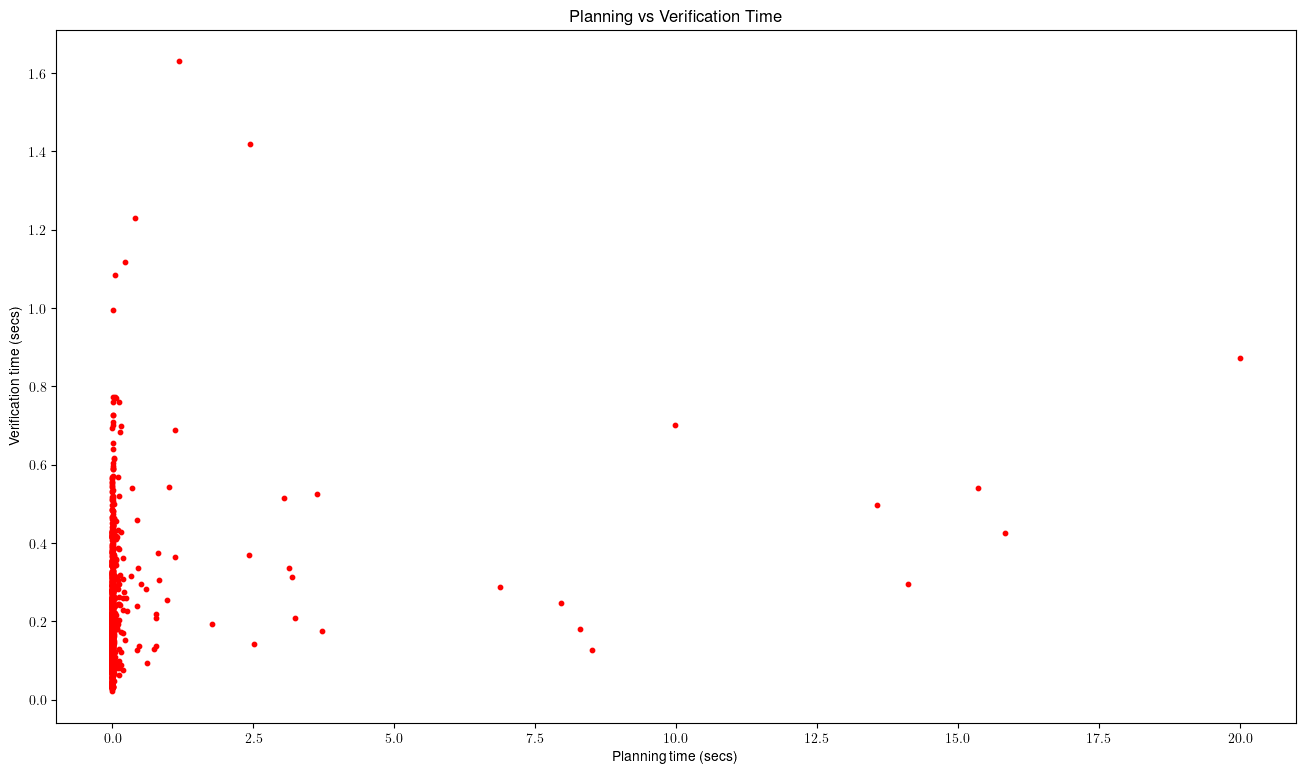

In [18]:
plt.figure(figsize = (16,9))
plt.scatter(plan_times, verif_times, s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Planning vs Verification Time')
plt.xlabel('Planning time (secs)')
plt.ylabel('Verification time (secs)')
plt.show()

In [19]:
plan_verif_ratio = time_data['plan_time'] / time_data['verif_time']

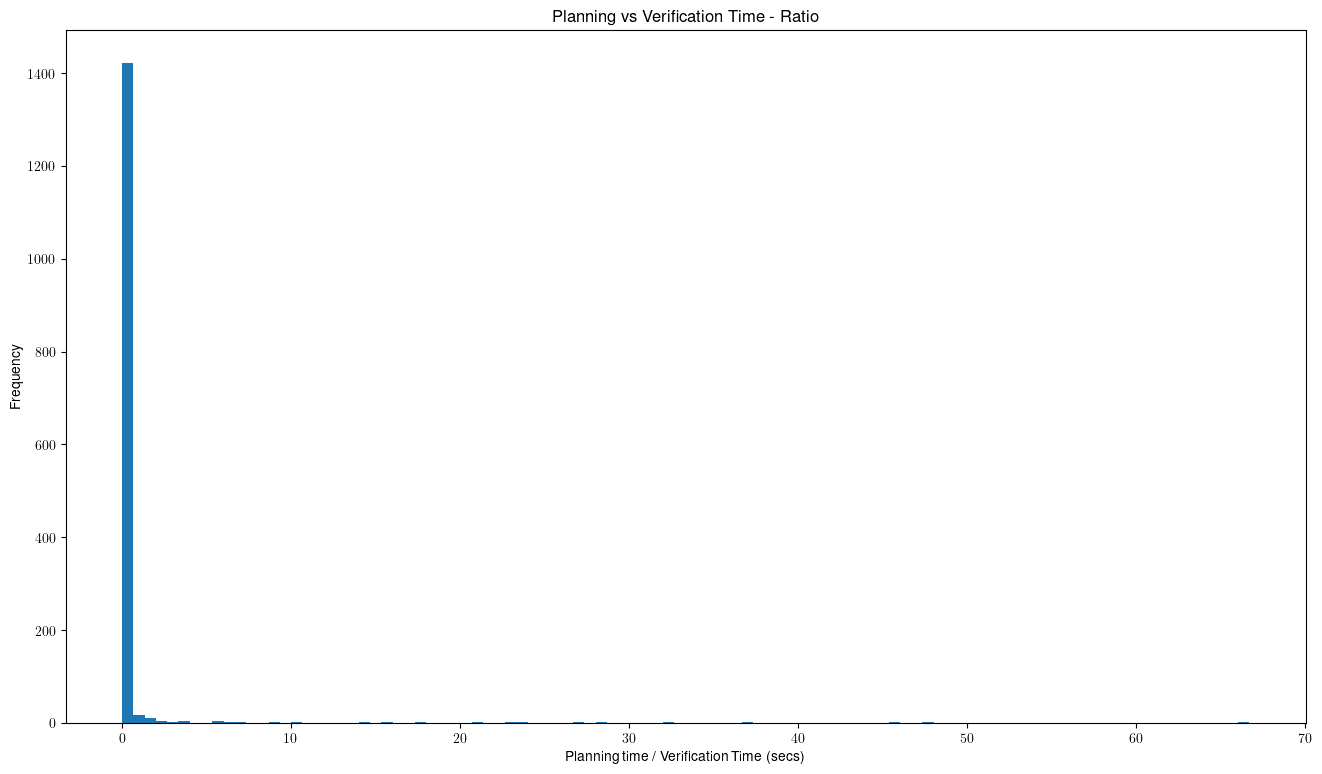

In [20]:
fig, axs = plt.subplots(figsize = (16,9))

axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [21]:
time_data_multiple_iterations = table[['instance', 'seed', 'iterations', 'plan_time', 'verif_time']].query('iterations > 1')
time_data_single_iteration = table[['instance', 'seed', 'iterations', 'plan_time', 'verif_time']].query('iterations == 1')

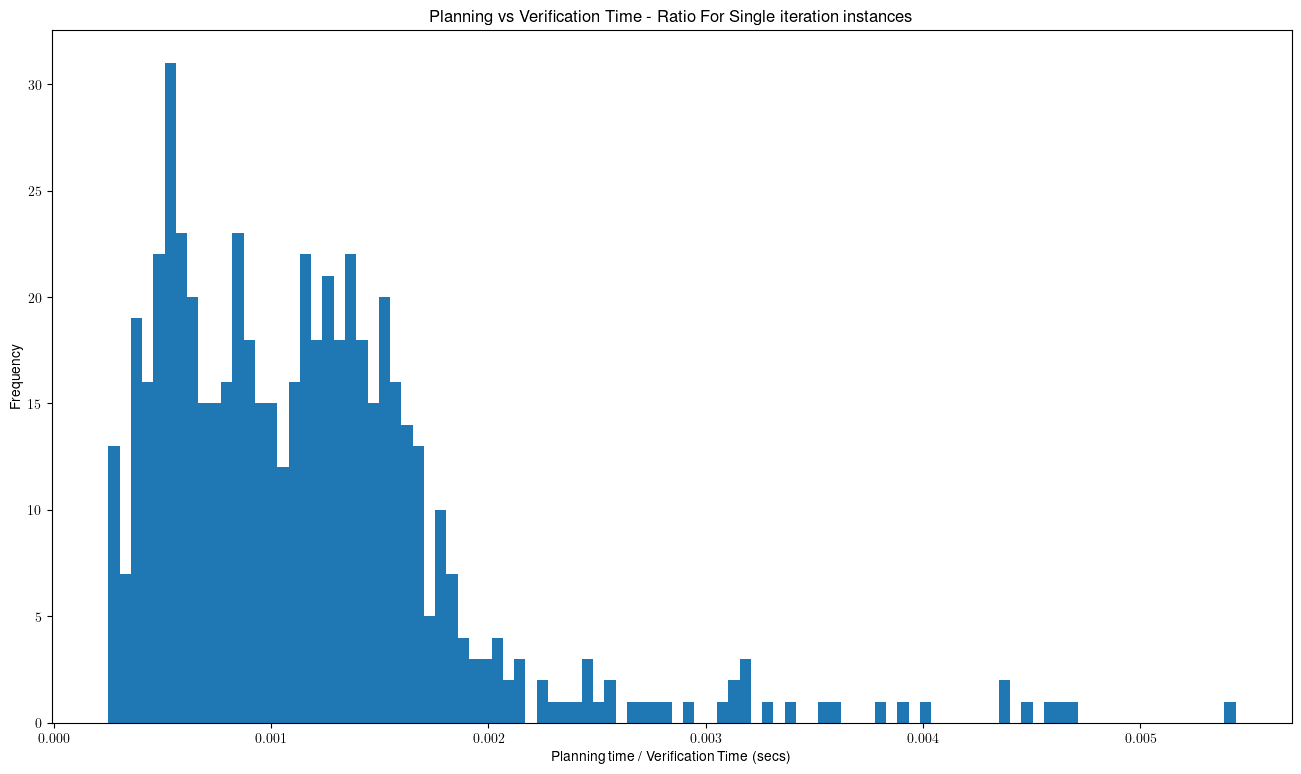

In [22]:
fig, axs = plt.subplots(figsize = (16,9))

plan_verif_ratio = time_data_single_iteration['plan_time'] / time_data_single_iteration['verif_time']
axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio For Single iteration instances')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

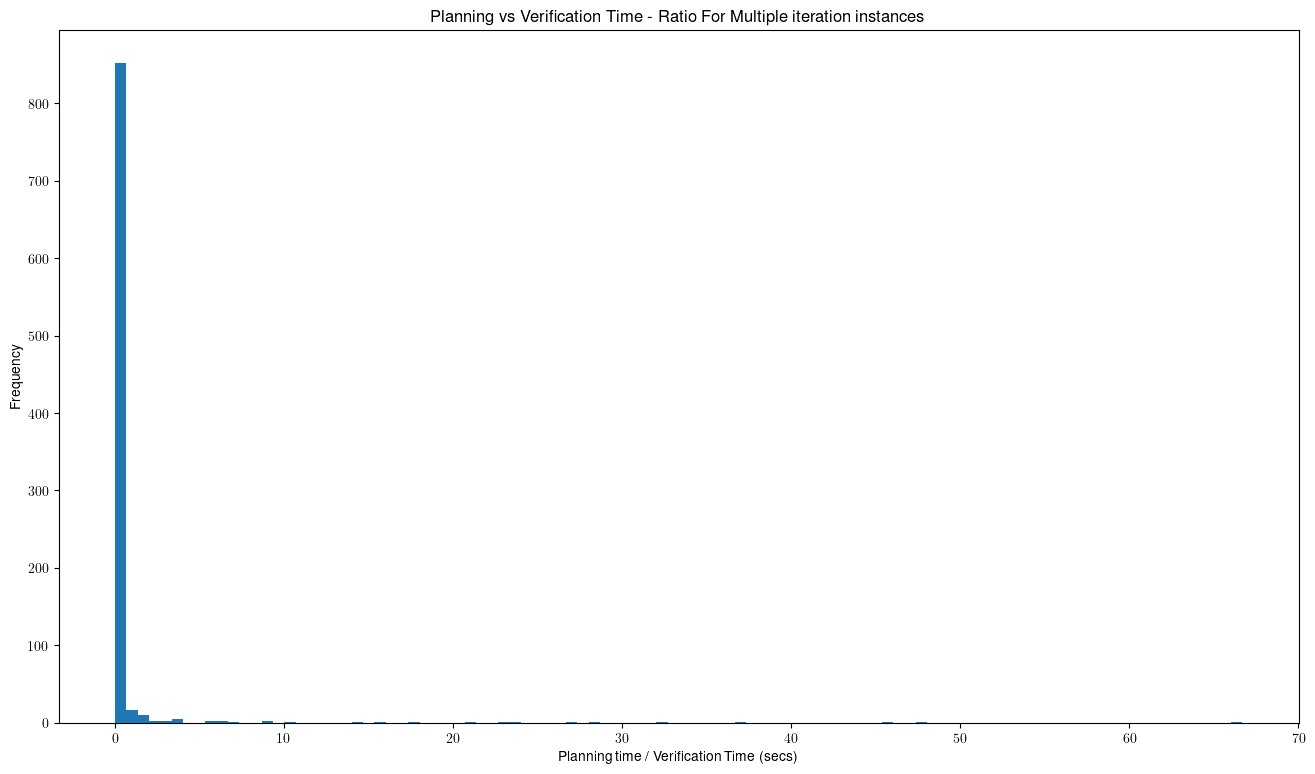

In [23]:
fig, axs = plt.subplots(figsize = (16,9))

plan_verif_ratio = time_data_multiple_iterations['plan_time'] / time_data_multiple_iterations['verif_time']
axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio For Multiple iteration instances')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [24]:
total_time_single_iteration = time_data_single_iteration['plan_time'] + time_data_single_iteration['verif_time']

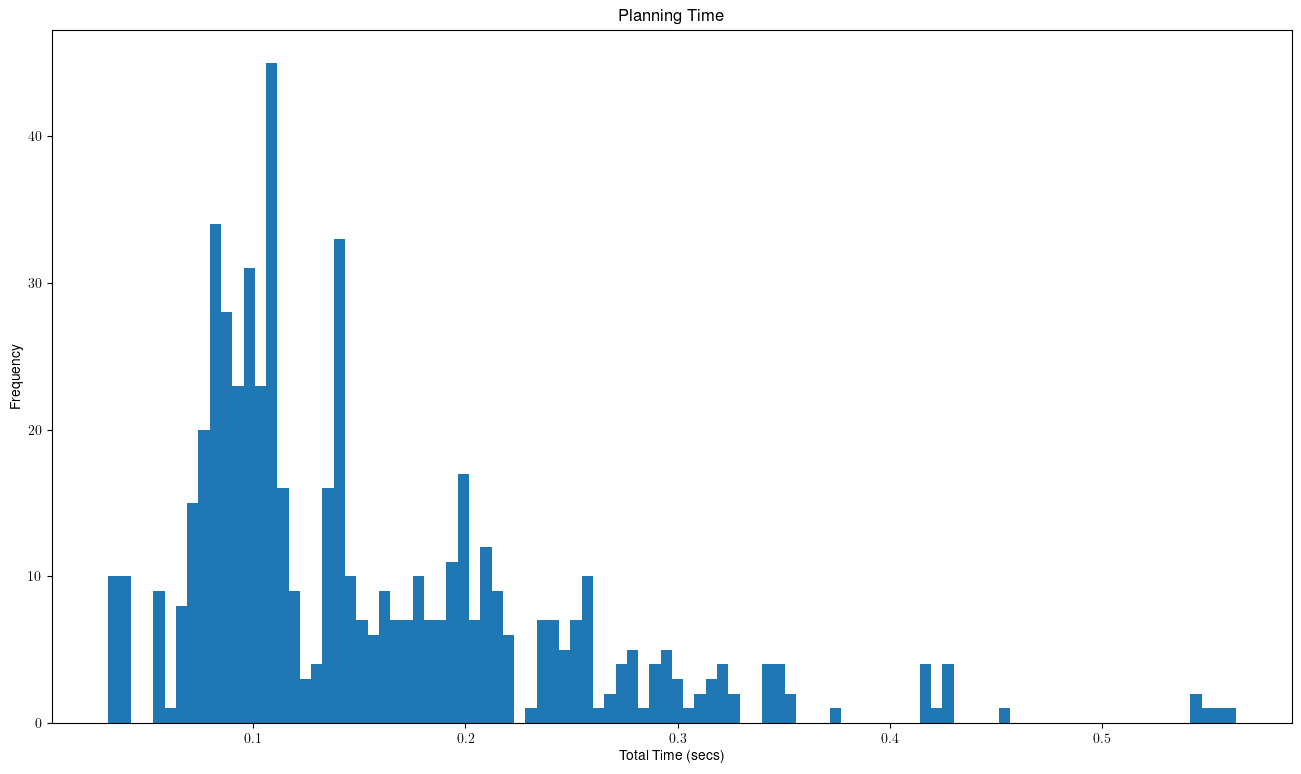

In [25]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(total_time_single_iteration, bins=100)

plt.title('Planning Time')
plt.xlabel('Total Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [26]:
total_time_multiple_iterations = time_data_multiple_iterations['plan_time'] + time_data_multiple_iterations['verif_time']

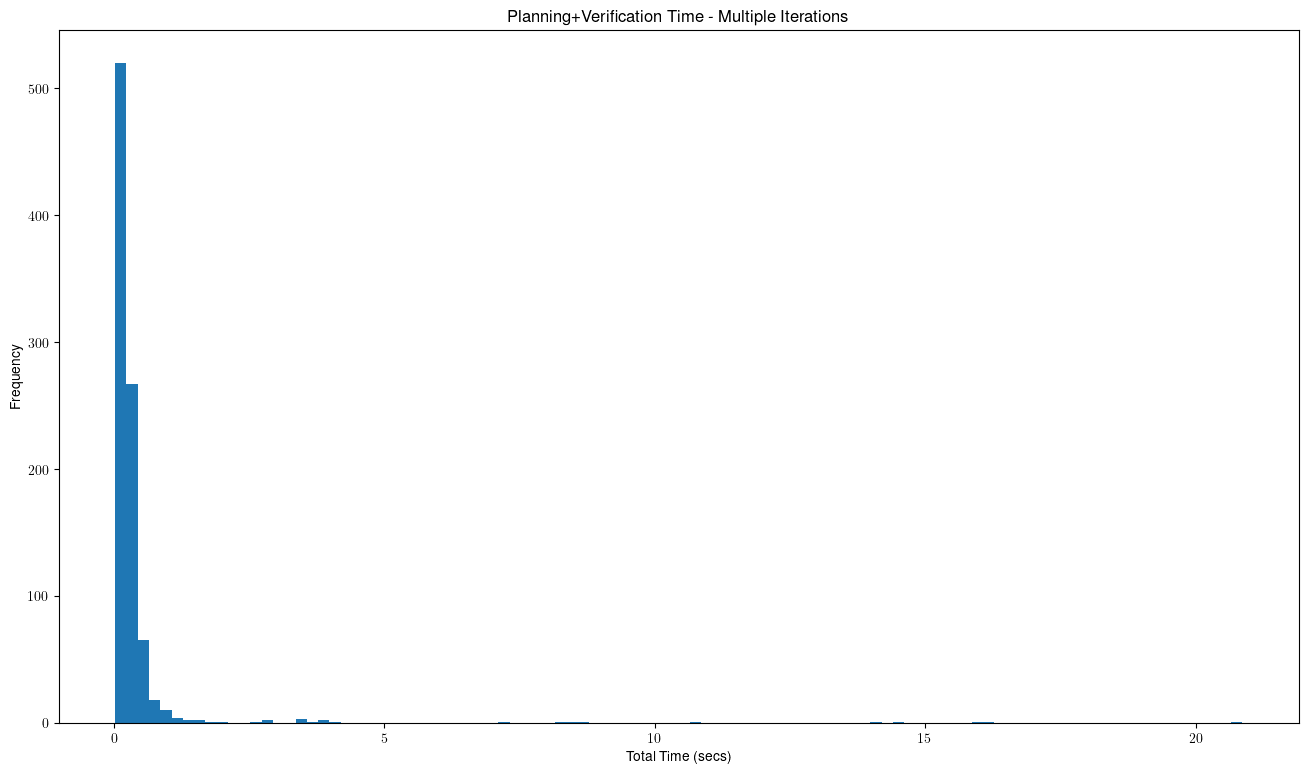

In [27]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(total_time_multiple_iterations, bins=100)

plt.title('Planning+Verification Time - Multiple Iterations')
plt.xlabel('Total Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [28]:
table[['holonomic_cost_k']]

,holonomic_cost_k
0,11.572438
1,10.031469
2,10.278146
3,9.800741
4,10.077781
...,...
1475,11.627204
1476,10.804386
1477,10.360349
1478,10.440148


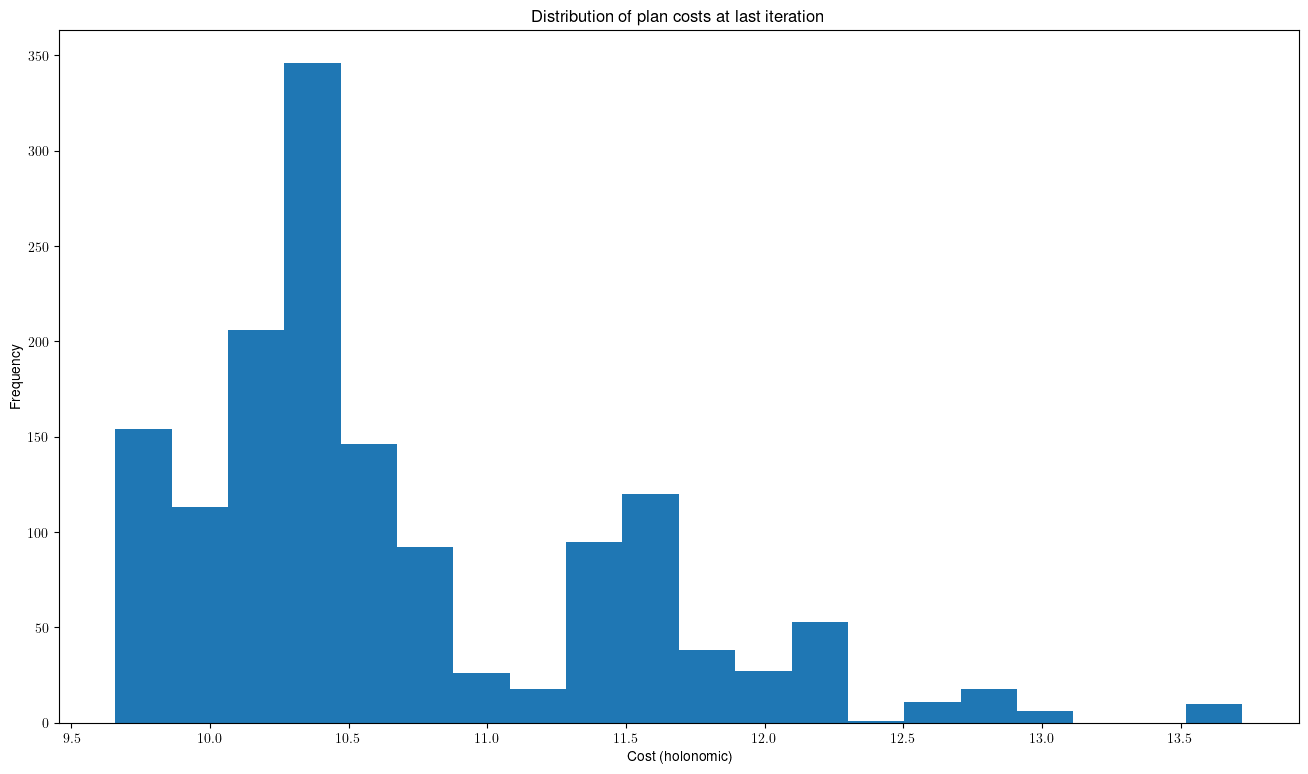

In [29]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(table[['holonomic_cost_k']].to_numpy(), bins=20)

plt.title('Distribution of plan costs at last iteration')
plt.xlabel('Cost (holonomic)')
plt.ylabel('Frequency')
plt.show()

In [30]:
holonomic_cost_diff = multiple_iterations['holonomic_cost_k'] - multiple_iterations['holonomic_cost_0']
holonomic_cost_diff

0       0.001835
1       0.000000
2      -0.741959
3      -0.071383
4       0.000000
          ...   
1471    0.000000
1472    0.000000
1473   -0.532186
1475   -3.098449
1476   -0.046587
Length: 910, dtype: float64

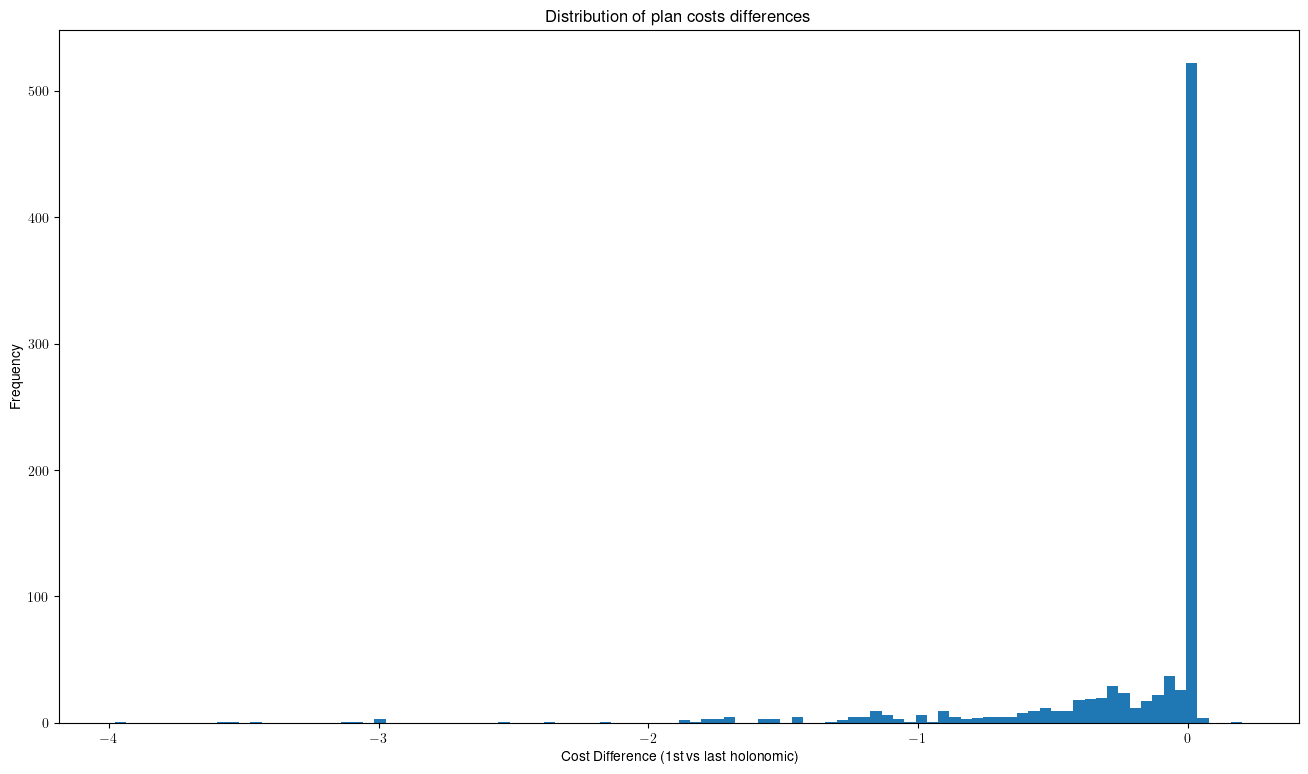

In [31]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(holonomic_cost_diff.to_numpy(), bins=100)

plt.title('Distribution of plan costs differences')
plt.xlabel('Cost Difference (1st vs last holonomic)')
plt.ylabel('Frequency')
plt.show()

In [32]:
smooth_cost_diff = table['smooth_cost_k'] - table['smooth_cost_0']
smooth_cost_diff

0       0.064098
1       0.000000
2      -0.961276
3      -0.105518
4       0.000000
          ...   
1475   -3.176742
1476   -0.096470
1477    0.000000
1478    0.000000
1479    0.000000
Length: 1480, dtype: float64

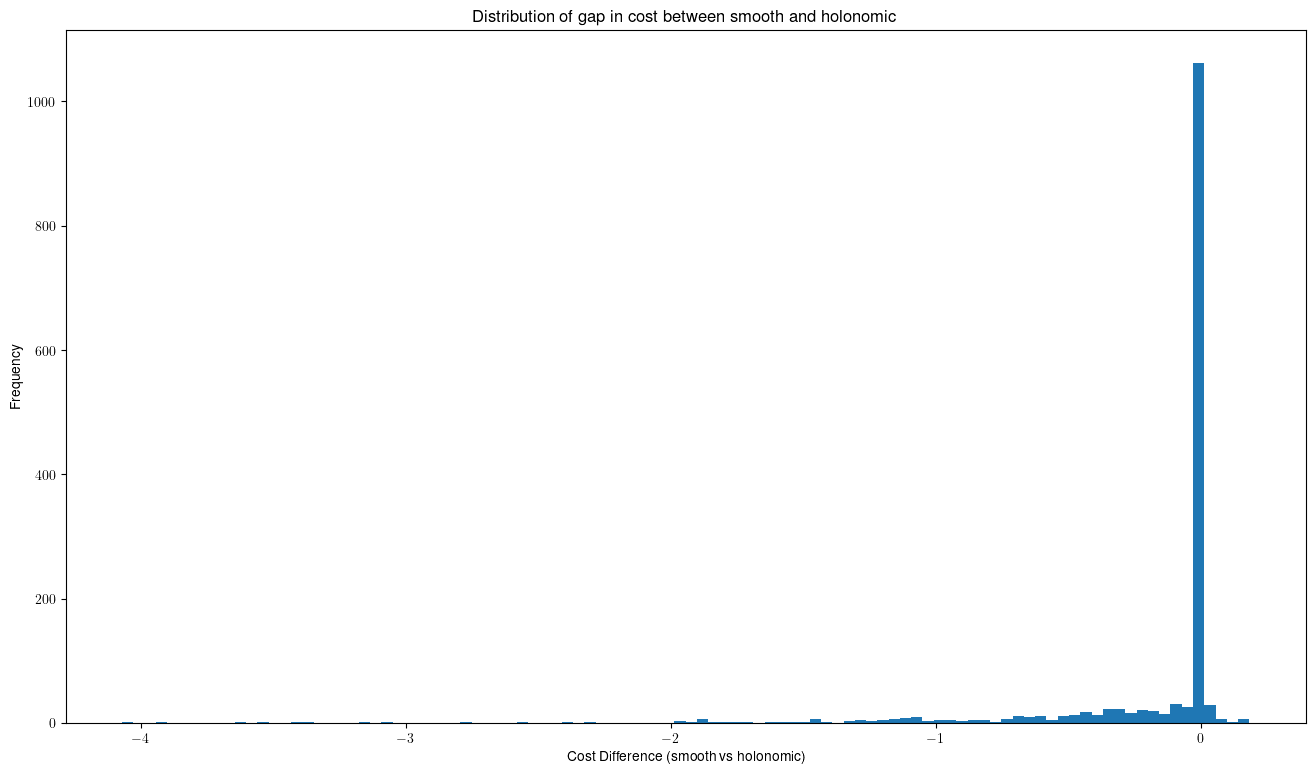

In [33]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(smooth_cost_diff.to_numpy(), bins=100)

plt.title('Distribution of gap in cost between smooth and holonomic')
plt.xlabel('Cost Difference (smooth vs holonomic)')
plt.ylabel('Frequency')
plt.show()

In [34]:
time_vs_plan_len = table[['instance', 'seed', 'plan_time', 'verif_time', 'plan_length']]
time_vs_plan_len

,instance,seed,plan_time,verif_time,plan_length
0,instance_173,567,0.005129,0.445653,7
1,instance_219,42,0.000195,0.181687,7
2,instance_217,567,0.004464,0.382426,5
3,instance_151,567,0.030138,0.424716,7
4,instance_152,1,0.003886,0.097111,5
...,...,...,...,...,...
1475,instance_016,1337,0.065465,0.358192,6
1476,instance_133,8193,0.005114,0.218408,8
1477,instance_056,1337,0.000105,0.239068,4
1478,instance_161,8193,0.000144,0.097822,5


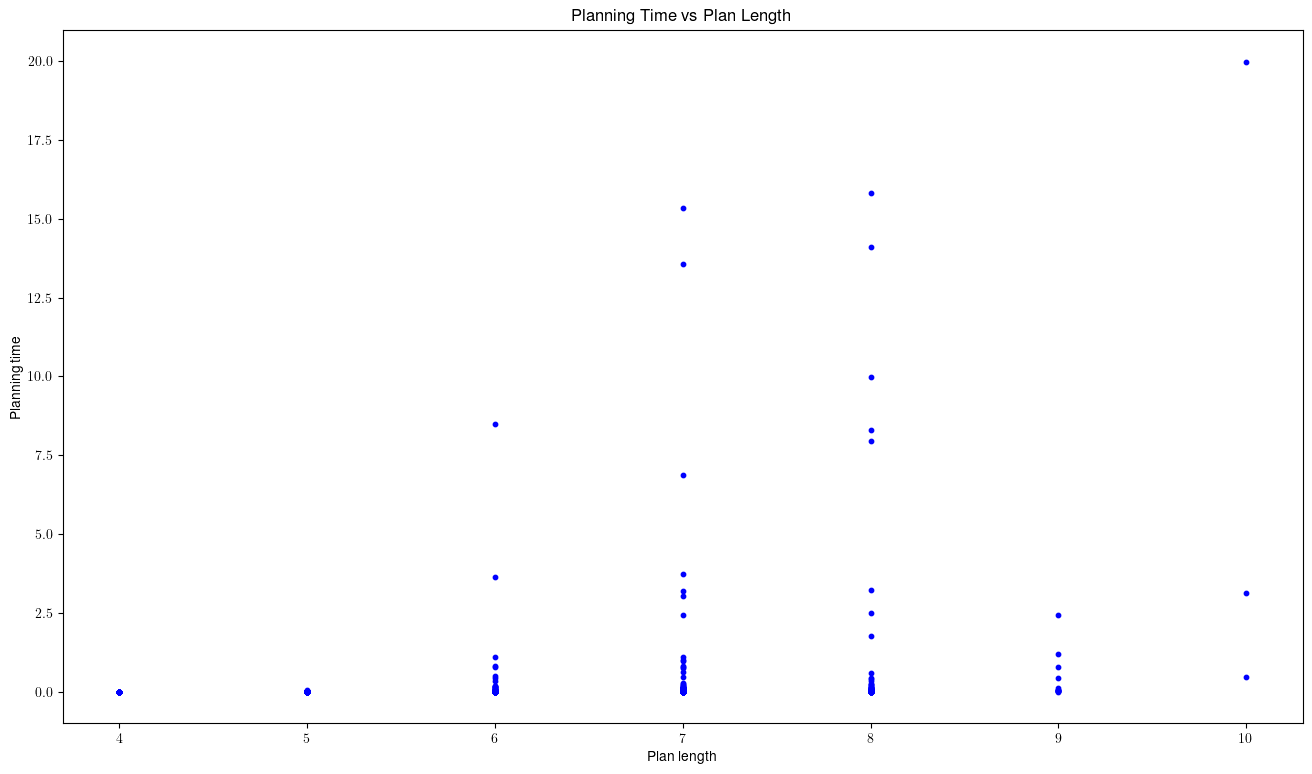

In [35]:
plt.figure(figsize = (16,9))
plan_times = time_vs_plan_len['plan_time'].to_numpy()
plan_length = time_vs_plan_len['plan_length'].to_numpy()
plt.scatter(plan_length, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Plan Length')
plt.xlabel('Plan length')
plt.ylabel('Planning time')
plt.show()

In [36]:
time_vs_no_goods = table[['instance', 'seed', 'plan_time', 'verif_time', 'num_no_goods', 'num_cusp_no_goods']]
time_vs_no_goods

,instance,seed,plan_time,verif_time,num_no_goods,num_cusp_no_goods
0,instance_173,567,0.005129,0.445653,1,0
1,instance_219,42,0.000195,0.181687,0,0
2,instance_217,567,0.004464,0.382426,2,0
3,instance_151,567,0.030138,0.424716,1,2
4,instance_152,1,0.003886,0.097111,0,4
...,...,...,...,...,...,...
1475,instance_016,1337,0.065465,0.358192,1,0
1476,instance_133,8193,0.005114,0.218408,1,1
1477,instance_056,1337,0.000105,0.239068,0,0
1478,instance_161,8193,0.000144,0.097822,0,0


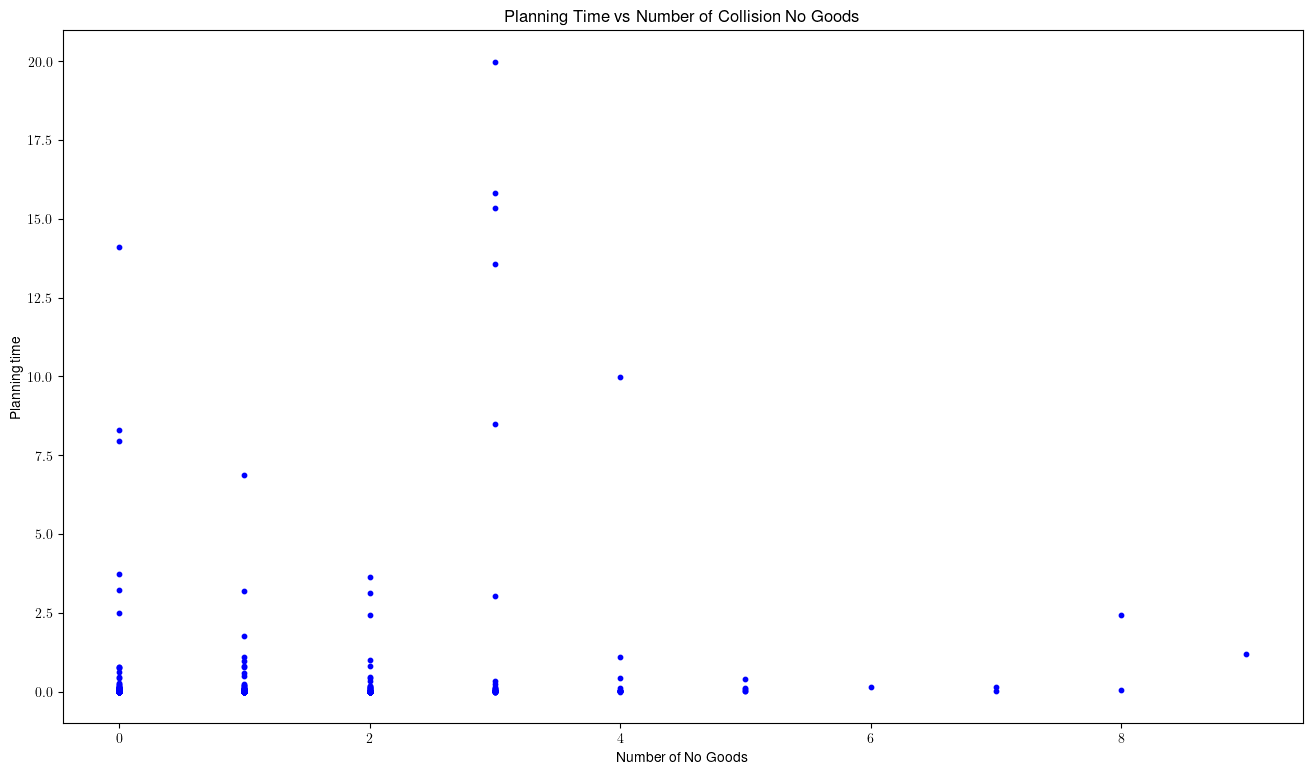

In [37]:
plt.figure(figsize = (16,9))
plan_times = time_vs_no_goods['plan_time'].to_numpy()
number_of_nogoods = time_vs_no_goods['num_no_goods'].to_numpy()
plt.scatter(number_of_nogoods, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Number of Collision No Goods')
plt.xlabel('Number of No Goods')
plt.ylabel('Planning time')
plt.show()

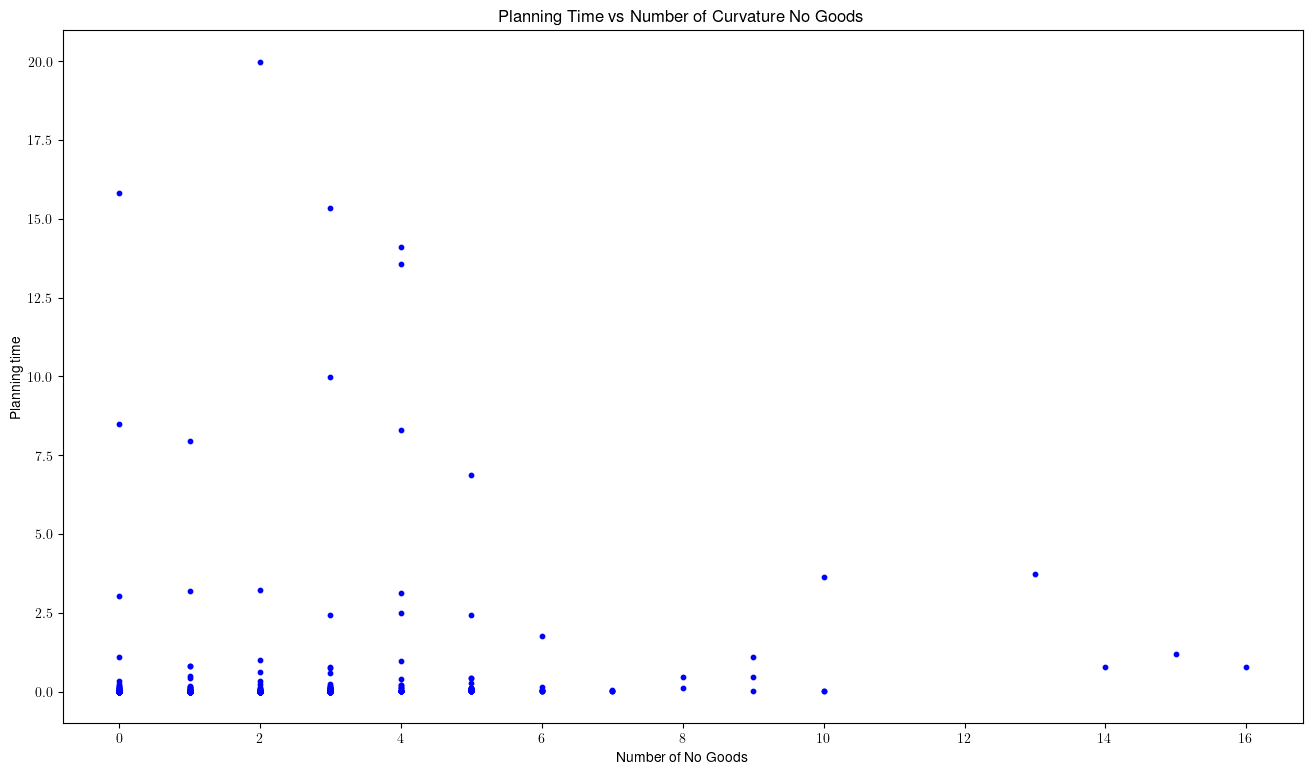

In [38]:
plt.figure(figsize = (16,9))
plan_times = time_vs_no_goods['plan_time'].to_numpy()
number_of_nogoods = time_vs_no_goods['num_cusp_no_goods'].to_numpy()
plt.scatter(number_of_nogoods, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Number of Curvature No Goods')
plt.xlabel('Number of No Goods')
plt.ylabel('Planning time')
plt.show()

In [39]:
time_breakpoints = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0]

In [40]:
coverage_at_breakpoint = np.zeros(len(time_breakpoints), dtype=int)

for i in range(len(plan_times)):
    for j in range(len(time_breakpoints)):
        if plan_times[i] <= time_breakpoints[j]:
            coverage_at_breakpoint[j] += 1
print("[{}]".format(", ".join(str(v) for v in coverage_at_breakpoint)))

[1172, 1248, 1377, 1405, 1446, 1457, 1470, 1475, 1480, 1480, 1480]


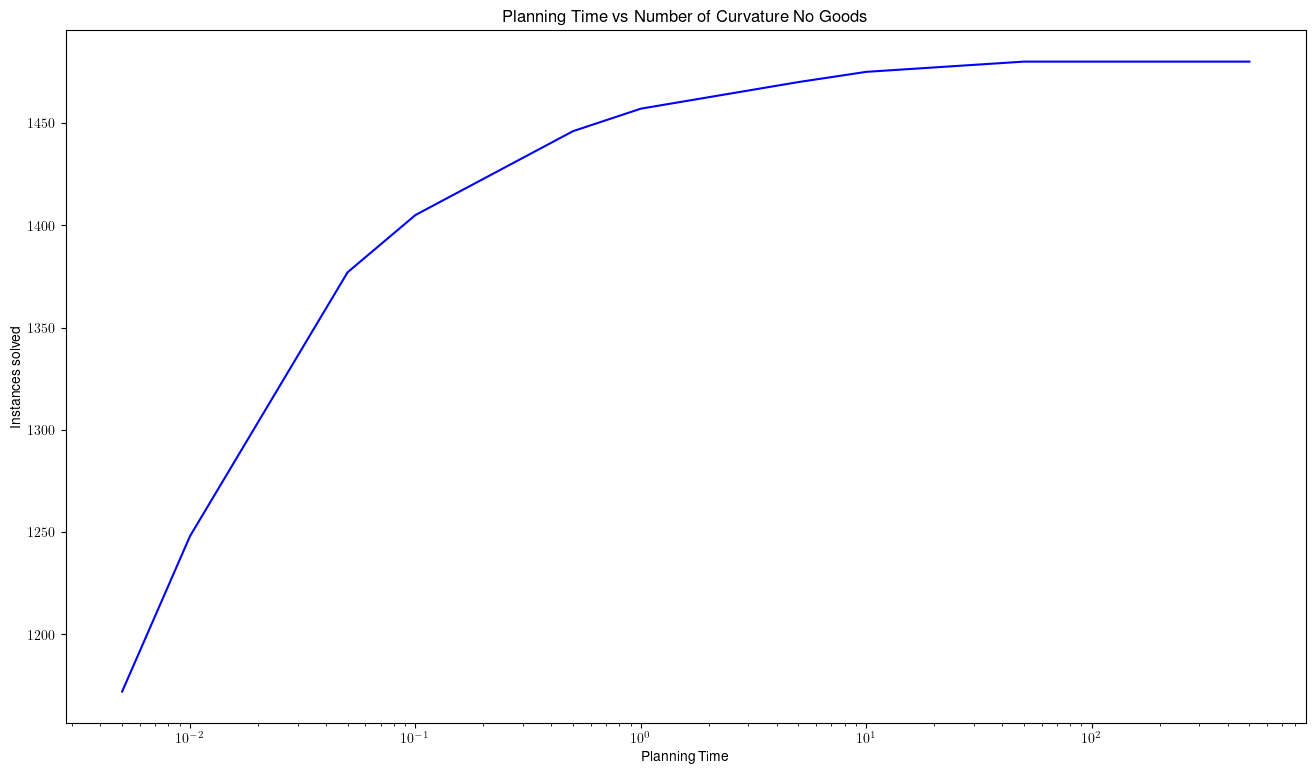

In [41]:
plt.figure(figsize = (16,9))
plt.plot(time_breakpoints, coverage_at_breakpoint, color='blue')
plt.title('Planning Time vs Number of Curvature No Goods')
plt.xlabel('Planning Time')
plt.xscale('log')
plt.ylabel('Instances solved')
plt.show()

#### Analysis w.r.t. BARN Metrics

In [42]:
file_pattern = '../BARN/instance*.json'
metadata_BARN = collect_instance_metadata(file_pattern)
metadata_table = tabulate_instance_metadata(metadata_BARN)

Found metadata for 300 instances


In [43]:
total_time_table = table[['instance', 'seed', 'iterations', 'num_no_goods', 'num_cusp_no_goods', 'plan_time', 'verif_time']]

In [44]:
total_time_table['total_time'] = total_time_table['plan_time'] + total_time_table['verif_time']

/tmp/ipykernel_10961/4224517660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_table['total_time'] = total_time_table['plan_time'] + total_time_table['verif_time']


In [45]:
total_time_table

,instance,seed,iterations,num_no_goods,num_cusp_no_goods,plan_time,verif_time,total_time
0,instance_173,567,2,1,0,0.005129,0.445653,0.450782
1,instance_219,42,2,0,0,0.000195,0.181687,0.181882
2,instance_217,567,3,2,0,0.004464,0.382426,0.386890
3,instance_151,567,4,1,2,0.030138,0.424716,0.454854
4,instance_152,1,4,0,4,0.003886,0.097111,0.100997
...,...,...,...,...,...,...,...,...
1475,instance_016,1337,3,1,0,0.065465,0.358192,0.423656
1476,instance_133,8193,3,1,1,0.005114,0.218408,0.223522
1477,instance_056,1337,1,0,0,0.000105,0.239068,0.239172
1478,instance_161,8193,1,0,0,0.000144,0.097822,0.097966


In [46]:
metadata_table

,instance,distance_closest_obstacle,average_visibility,dispersion,characterisitic_dimensions,tortuosity
0,instance_157,1.765225,4.795159,4.974359,2.196642,1.524747
1,instance_142,3.144283,8.739424,2.687500,8.123383,1.126505
2,instance_040,4.737938,10.563817,2.000000,10.798692,1.077837
3,instance_197,1.937390,5.563366,4.709677,3.306763,1.065729
4,instance_296,1.560408,4.109565,4.342857,1.518347,1.248066
...,...,...,...,...,...,...
295,instance_194,1.235520,3.674314,4.437500,0.928998,1.099499
296,instance_252,3.160814,7.436131,3.225806,5.575897,1.054628
297,instance_271,1.813977,4.232665,4.285714,2.477100,1.183793
298,instance_272,1.359000,4.062666,4.193548,1.254822,1.037314


In [47]:
metadata_cmp = total_time_table.set_index('instance').join(metadata_table.set_index('instance'), on=['instance'])
metadata_cmp

,seed,iterations,num_no_goods,num_cusp_no_goods,plan_time,verif_time,total_time,distance_closest_obstacle,average_visibility,dispersion,characterisitic_dimensions,tortuosity
instance,,,,,,,,,,,,
instance_173,567,2,1,0,0.005129,0.445653,0.450782,1.389389,3.593876,5.161290,1.434059,1.075517
instance_219,42,2,0,0,0.000195,0.181687,0.181882,1.839234,4.534971,5.076923,2.526331,1.337293
instance_217,567,3,2,0,0.004464,0.382426,0.386890,1.899723,4.288718,4.903226,2.817914,1.107409
instance_151,567,4,1,2,0.030138,0.424716,0.454854,1.697167,4.264924,4.937500,1.957107,1.124411
instance_152,1,4,0,4,0.003886,0.097111,0.100997,2.315245,5.685802,4.352941,3.357480,1.277040
...,...,...,...,...,...,...,...,...,...,...,...,...
instance_016,1337,3,1,0,0.065465,0.358192,0.423656,2.052145,5.129947,4.578947,3.113065,1.411939
instance_133,8193,3,1,1,0.005114,0.218408,0.223522,1.981678,5.548145,5.000000,3.613738,1.176616
instance_056,1337,1,0,0,0.000105,0.239068,0.239172,3.491724,9.607689,3.354839,8.308893,1.065729


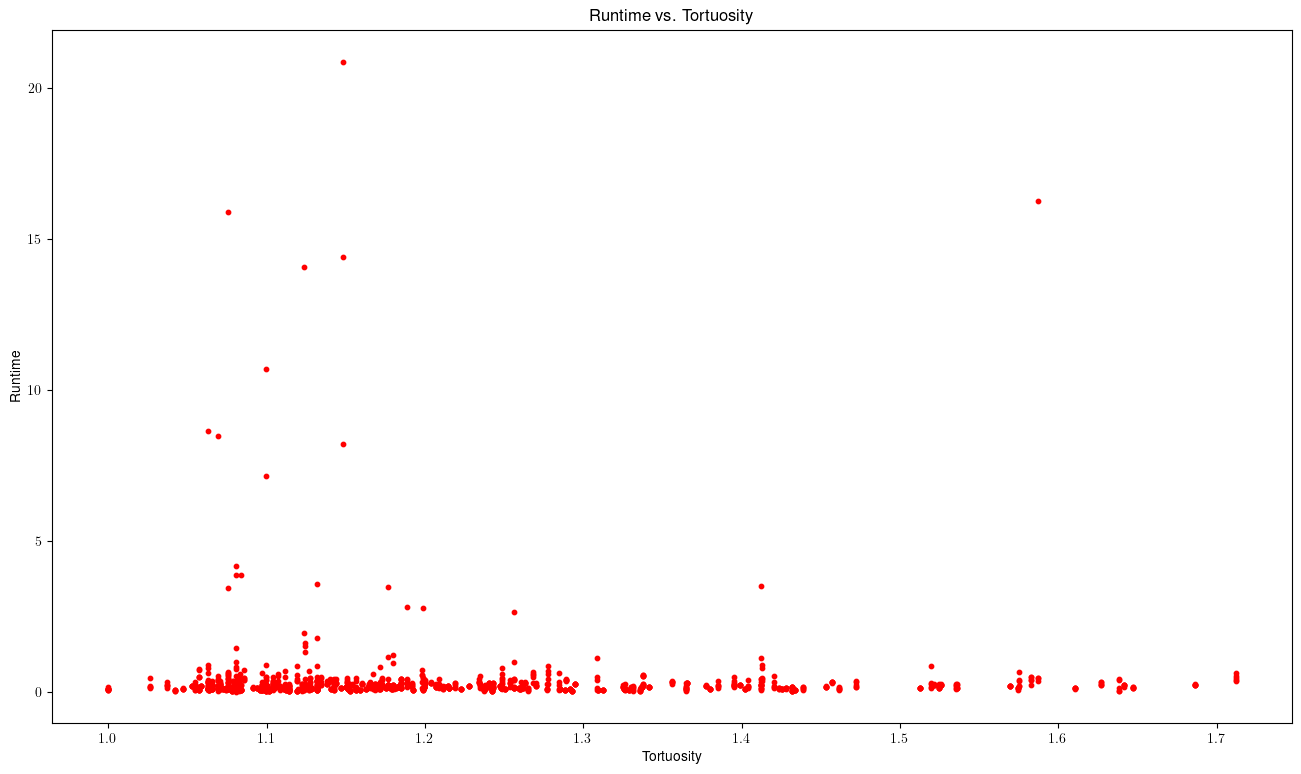

In [48]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['plan_time'] + metadata_cmp['verif_time'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Runtime')
plt.show()

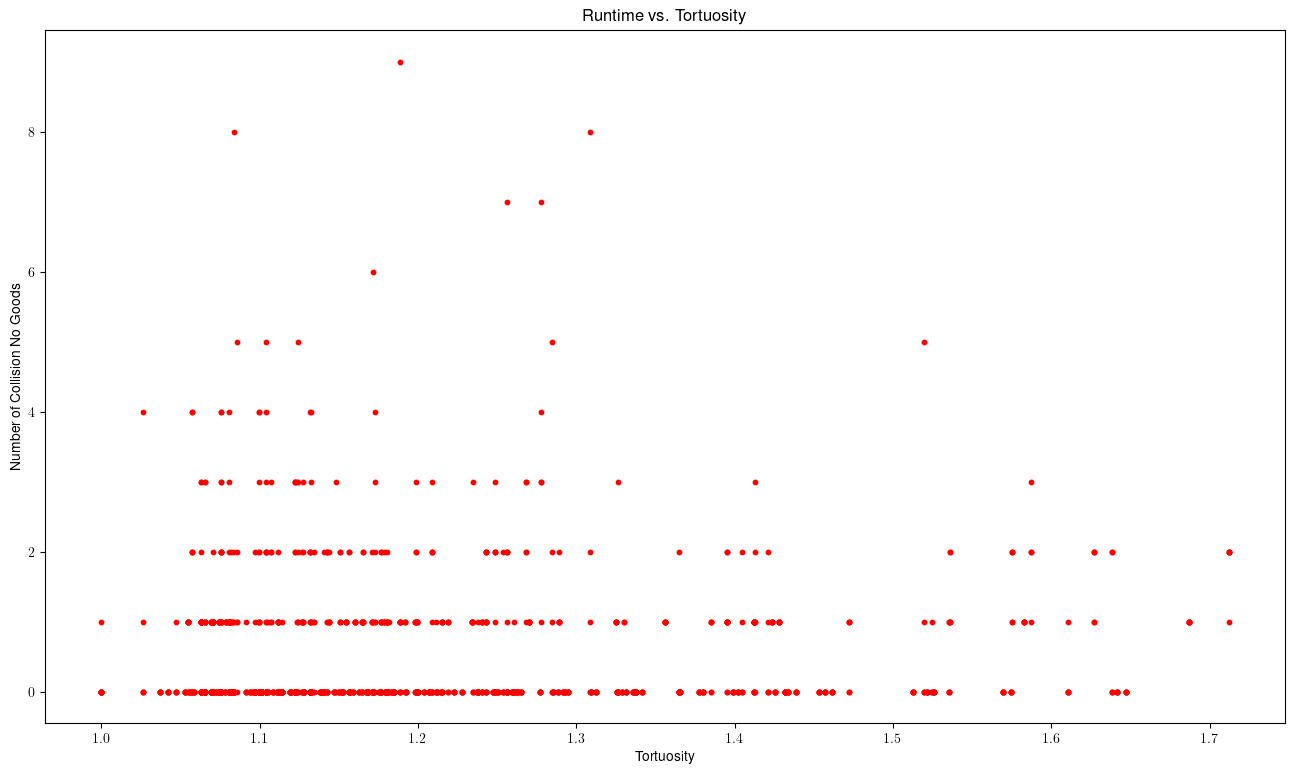

In [49]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['num_no_goods'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Number of Collision No Goods')
plt.show()

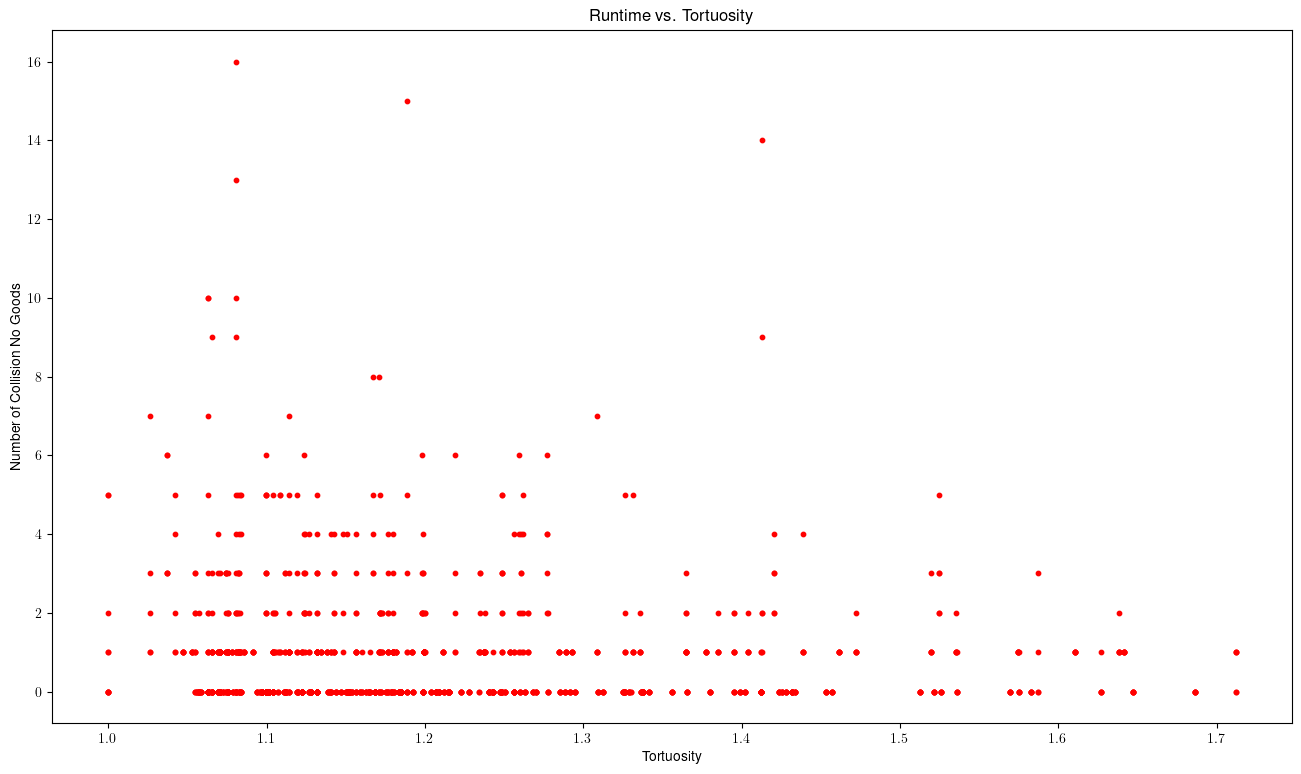

In [50]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['num_cusp_no_goods'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Number of Collision No Goods')
plt.show()